# A Machine Learning Approach to Glycerin to Glycol Production Analysis
========================================================================================================

## PROPYLENE GLYCOL (PG) YIELD OPTIMIZATION

In this section, we will develop models to understand the relationships between key parameters and optimize to enhance the conversion process and maximize output of Propylene Glycol (PG). By identifying the most influential factors and their interactions, we aim to provide actionable insights for process improvement and efficiency enhancement. The ultimate goal is to leverage predictive modeling to achieve higher yields while maintaining cost-effectiveness.


## READING THE DATA

### Importing the libraries

Let us start by importing the necessary libraries.

In [79]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from pygad import GA

from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')

### Loading the preprocessed data

We will load the preprocessed data from the 'GeneralAnalysis' notebook.

In [80]:
hydrogen_df = pd.read_pickle("data/hydrogen_df.pkl")
numerical_df = pd.read_pickle("data/numerical_df.pkl")
no_calc_df = pd.read_pickle("data/no_calc_df.pkl")

In [81]:
display(hydrogen_df.head())
display(numerical_df.head())
display(no_calc_df.head())

,Glycerine to Glycol Sample ID,Sample time,Liquid Feed \n(L/h),Pure H2 Gas Flow Setpoint on PLC\n(g/h),Recycled H2 Gas Flow (g/h),Total H2 Gas Flow (g/h),RX-203 Pressure (psig),T2 (Top)\n(°C),T3 \n(°C),T4\n(°C),...,Glycerol Feed Area (HPLC),Glycerol Feed Concentration (g/L),Glycerol Remaining Concentration (g/L),EG Concentration (g/L),PG Concentration (g/L),PG/EG Ratio,Conversion (%),EG Yield (%),PG Yield (%),Overall Glycol Yield (%)
1,20231015-C3-G1-RX203-001,2023-10-15 15:00:00,4.0,250.0,150.0,400,631.0,216.0,219.0,221.0,...,7670.7621,581.443767,378.229508,13.219690,208.391724,15.763738,0.349499,0.065053,1.025478,1.090531
3,20231015-C3-G1-RX203-003,2023-10-15 17:00:00,4.0,250.0,150.0,400,633.0,218.0,221.0,225.0,...,7670.7621,581.443767,376.341444,16.838202,264.832496,15.728075,0.352747,0.082097,1.291221,1.373318
5,20231015-C3-G1-RX203-005,2023-10-15 22:00:00,4.0,250.0,0.0,250,606.0,210.0,213.0,214.0,...,7670.7621,581.443767,169.054170,17.034776,323.029406,18.962938,0.709251,0.041307,0.783311,0.824619
6,20231015-C3-G1-RX203-006,2023-10-15 23:00:00,4.0,250.0,0.0,250,613.0,213.0,215.0,216.0,...,7670.7621,581.443767,173.375733,19.375754,335.963875,17.339397,0.701819,0.047482,0.823304,0.870785
7,20231015-C3-G1-RX203-007,2023-10-15 00:00:00,4.0,250.0,0.0,250,606.0,213.0,216.0,217.0,...,7670.7621,581.443767,138.497235,18.031212,303.250974,16.818114,0.761805,0.040707,0.684622,0.725329


,Liquid Feed \n(L/h),Pure H2 Gas Flow Setpoint on PLC\n(g/h),Recycled H2 Gas Flow (g/h),Total H2 Gas Flow (g/h),RX-203 Pressure (psig),T2 (Top)\n(°C),T3 \n(°C),T4\n(°C),T5 (Bottom)\n(°C),After HEX (°C),...,Glycerol Feed Area (HPLC),Glycerol Feed Concentration (g/L),Glycerol Remaining Concentration (g/L),EG Concentration (g/L),PG Concentration (g/L),PG/EG Ratio,Conversion (%),EG Yield (%),PG Yield (%),Overall Glycol Yield (%)
1,4.0,250.0,150.0,400,631.0,216.0,219.0,221.0,223.0,227.0,...,7670.7621,581.443767,378.229508,13.219690,208.391724,15.763738,0.349499,0.065053,1.025478,1.090531
3,4.0,250.0,150.0,400,633.0,218.0,221.0,225.0,223.0,228.0,...,7670.7621,581.443767,376.341444,16.838202,264.832496,15.728075,0.352747,0.082097,1.291221,1.373318
5,4.0,250.0,0.0,250,606.0,210.0,213.0,214.0,214.0,239.0,...,7670.7621,581.443767,169.054170,17.034776,323.029406,18.962938,0.709251,0.041307,0.783311,0.824619
6,4.0,250.0,0.0,250,613.0,213.0,215.0,216.0,217.0,239.0,...,7670.7621,581.443767,173.375733,19.375754,335.963875,17.339397,0.701819,0.047482,0.823304,0.870785
7,4.0,250.0,0.0,250,606.0,213.0,216.0,217.0,218.0,239.0,...,7670.7621,581.443767,138.497235,18.031212,303.250974,16.818114,0.761805,0.040707,0.684622,0.725329


,Liquid Feed \n(L/h),Pure H2 Gas Flow Setpoint on PLC\n(g/h),Recycled H2 Gas Flow (g/h),Total H2 Gas Flow (g/h),RX-203 Pressure (psig),T2 (Top)\n(°C),T3 \n(°C),T4\n(°C),T5 (Bottom)\n(°C),After HEX (°C),Average Temp.\n(°C),Feed \npH,Product \npH,Glycerol Area,EG Area,PG Area,Glycerol Feed Area (HPLC),Glycerol Feed Concentration (g/L)
1,4.0,250.0,150.0,400,631.0,216.0,219.0,221.0,223.0,227.0,219.75,11.30,3.56,4989.8352,133.1288,2472.0252,7670.7621,581.443767
3,4.0,250.0,150.0,400,633.0,218.0,221.0,225.0,223.0,228.0,221.75,11.30,3.95,4964.9267,169.5690,3141.5480,7670.7621,581.443767
5,4.0,250.0,0.0,250,606.0,210.0,213.0,214.0,214.0,239.0,212.75,11.15,4.43,2230.2661,171.5486,3831.9028,7670.7621,581.443767
6,4.0,250.0,0.0,250,613.0,213.0,215.0,216.0,217.0,239.0,215.25,11.10,4.43,2287.2788,195.1234,3985.3366,7670.7621,581.443767
7,4.0,250.0,0.0,250,606.0,213.0,216.0,217.0,218.0,239.0,216.00,11.10,4.26,1827.1403,181.5832,3597.2832,7670.7621,581.443767


In [82]:
print(f"hydrogen_df contains {hydrogen_df.shape[0]} rows and {hydrogen_df.shape[1]} columns")
print(f"numerical_df contains {numerical_df.shape[0]} rows and {numerical_df.shape[1]} columns")
print(f"no_calc_df contains {no_calc_df.shape[0]} rows and {no_calc_df.shape[1]} columns")

hydrogen_df contains 135 rows and 28 columns
numerical_df contains 135 rows and 26 columns
no_calc_df contains 135 rows and 18 columns


## PREDICTIVE MODELLING

### Creating an evaluation metrics function

When predicting glycol yield, it is crucial to evaluate the performance of the models using a variety of metrics to ensure robust and reliable predictions. Each metric offers unique insights into the model's accuracy and error behavior:
* Root Mean Squared Error (RMSE) - provides an intuitive sense of the typical magnitude of errors, expressed in the same unit as the target variable. It heavily penalizes large deviations, making it particularly useful when significant errors are undesirable in glycol yield prediction.
* Mean Absolute Error (MAE) - measures the average size of errors without disproportionately penalizing outliers, offering a straightforward and interpretable assessment of model accuracy. This is helpful when all errors, regardless of their magnitude, are equally important.
* Mean Squared Error (MSE) - emphasizes larger errors even more than RMSE, making it suitable for identifying and addressing extreme discrepancies in predictions. It is also commonly used as a loss function during model training, aiding in optimization.
* Mean Absolute Percentage Error (MAPE) - evaluates errors as a percentage of actual values, making it scale-independent and easy to interpret. This is particularly valuable when comparing the model's performance across different scales of glycol yield or process conditions.
* R-Squared - explains the proportion of variance in the target variable (glycol yield) that is explained by the model's predictors. It provides a holistic view of the model's ability to capture the relationship between input features and the target.

In [83]:
rmse_scores = {}
r2_scores = {}
mae_scores = {}
mape_scores = {}


def evaluate_model(model_name, model, model_result, X_test, y_test):
    best_model = model.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    rmse_scores[model_name] = -model_result.best_score_
    r2_scores[model_name] = r2
    mae_scores[model_name] = mae
    mape_scores[model_name] = mape

    print(f"Best parameters for {model_name}: {model_result.best_params_}")
    print(f"{model_name} RMSE: {-model_result.best_score_:.2f}")
    print(f"{model_name} R^2 Score: {r2:.2f}%")
    print(f"{model_name} MAE: {mae:.2f}")
    print(f"{model_name} MAPE: {mape:.2f}%")

### Selecting features

We used the 'PG Area' as target variable. Before building the model, we carefully selected the features to ensure relevance and minimize redundancy. The following adjustments were made:

* Utilized the average temperature (Ave. Temp) instead of the individual temperature readings (T2, T3, T4, and T5) for simplicity and to reduce multicollinearity.
* Removed the highly correlated feature glycerol feed area, as it strongly correlates with glycerol feed concentration.
* Excluded total H2 gas flow since it is a derived feature, representing the sum of pure H2 gas flow and recycled H2 gas flow.

In [84]:
uncontrolled_factors = [
    'T2 (Top)\n(°C)',
    'T3 \n(°C)',
    'T4\n(°C)',
    'T5 (Bottom)\n(°C)',
]

output_factors = [
    # 'Product \npH',
    # 'Glycerol Area',
    'EG Area',
    'PG Area',
]

highly_correlated_factors = [
    'Glycerol Feed Area (HPLC)',  # with Glycerol Feed Concentration (g/L)
    'Total H2 Gas Flow (g/h)',
]

factors_to_remove = uncontrolled_factors + output_factors + highly_correlated_factors

y = no_calc_df['PG Area']
X = no_calc_df.drop(columns=factors_to_remove, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=101)

In [85]:
X.columns.tolist()

['Liquid Feed \n(L/h)',
 'Pure H2 Gas Flow Setpoint on PLC\n(g/h)',
 'Recycled H2 Gas Flow (g/h)',
 'RX-203 Pressure (psig)',
 'After HEX (°C)',
 'Average Temp.\n(°C)',
 'Feed \npH',
 'Product \npH',
 'Glycerol Area',
 'Glycerol Feed Concentration (g/L)']

### Random Forest Analysis

Best for: high-dimensional data | Pros: robust to overfitting, handles feature importance | Cons: slow to train, hard to interpret individual trees

In [86]:
rf_model = RandomForestRegressor(warm_start=True, random_state=101, n_jobs=-1)

rf_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [None, 2, 5],
    'min_samples_leaf': [2, 5],
}

rf_search = GridSearchCV(rf_model, rf_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [87]:
rf_result = rf_search.fit(X_train, y_train)

evaluate_model("Random Forest", rf_search, rf_result, X_test, y_test)

Best parameters for Random Forest: {'max_depth': 20, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000}
Random Forest RMSE: 925.01
Random Forest R^2 Score: 0.70%
Random Forest MAE: 675.17
Random Forest MAPE: 17.47%


With an RMSE of 925.01, the model's predictions have an average error of approximately 925.01 units. Given that the target variable ranges from 51.83 to 9564.78, this error is moderate. On average, the model's error represents about 9.7% of the target range. This suggests that while the model is capturing some variation in the target, there is still room for improvement in accuracy

The model captures around 70% of the variance in the target variable, indicating a reasonably strong fit and suggesting the features used are effective predictors.

### Linear/Ridge/Lasso Regression

Linear | Best for: simple relationships, small datasets | Pros: easy to interpret, fast to train | Cons: sensitive to outliers, assumes linearity

Ridge | Best for: data with multi collinearity, small datasets | Pros: handles multi collinearity, prevents overfitting

Lasso | Best for: sparse models, feature selection | Pros: automatic feature selection

In [88]:
lr_model = LinearRegression(n_jobs=-1)
ridge_model = Ridge(random_state=101)
lasso_model = Lasso(warm_start=True, random_state=101)

lr_param_grid = {
    'fit_intercept': [True, False],
}

ridge_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10, 100],
    'fit_intercept': [True, False],
    'max_iter': [None, 1000, 5000, 10000],
    'tol': [1e-3, 1e-4, 1e-5]
}

lasso_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10, 100],
    'fit_intercept': [True, False],
    'precompute': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'selection': ['cyclic', 'random']
}

lr_search = GridSearchCV(lr_model, lr_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

ridge_search = GridSearchCV(ridge_model, ridge_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

lasso_search = GridSearchCV(lasso_model, lasso_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [89]:
lr_result = lr_search.fit(X_train, y_train)

evaluate_model("Linear", lr_search, lr_result, X_test, y_test)

Best parameters for Linear: {'fit_intercept': True}
Linear RMSE: 870.09
Linear R^2 Score: 0.76%
Linear MAE: 659.71
Linear MAPE: 13.45%


In [90]:
ridge_result = ridge_search.fit(X_train, y_train)

evaluate_model("Ridge", ridge_search, ridge_result, X_test, y_test)

Best parameters for Ridge: {'alpha': 100, 'fit_intercept': True, 'max_iter': None, 'tol': 0.001}
Ridge RMSE: 848.50
Ridge R^2 Score: 0.78%
Ridge MAE: 640.69
Ridge MAPE: 13.00%


In [91]:
lasso_result = lasso_search.fit(X_train, y_train)

evaluate_model("Lasso", lasso_search, lasso_result, X_test, y_test)

Best parameters for Lasso: {'alpha': 100, 'fit_intercept': True, 'precompute': False, 'selection': 'cyclic', 'tol': 1e-05}
Lasso RMSE: 847.13
Lasso R^2 Score: 0.77%
Lasso MAE: 643.75
Lasso MAPE: 13.19%


With an RMSE of 847~870, given the range of the target variable, this level of error is moderate, indicating that the model is performing reasonably well.

The models capture around 76~78% of the variance in the target variable, indicating a strong fit and suggesting the features used are good predictors.

### SGD Regressor

Best for: large datasets | Pros: efficient with large datasets | Cons: requires careful tuning, sensitive to learning rate and regularization settings

In [92]:
sgd_model = SGDRegressor(warm_start=True, random_state=101)

sgd_param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1e-5, 1e-4, 1e-3],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 5000, 1000],
    'tol': [1e-3, 1e-4, 1e-5],
    'fit_intercept': [True, False]
}

sgd_search = GridSearchCV(sgd_model, sgd_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [93]:
sgd_result = sgd_search.fit(X_train, y_train)

evaluate_model("SGD", sgd_search, sgd_result, X_test, y_test)

Best parameters for SGD: {'alpha': 0.001, 'eta0': 0.1, 'fit_intercept': False, 'learning_rate': 'adaptive', 'loss': 'huber', 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.001}
SGD RMSE: 861.61
SGD R^2 Score: 0.79%
SGD MAE: 570.72
SGD MAPE: 12.32%


With an RMSE of 861.61, given the range of the target variable, this error level indicates the model is fairly accurate.

An R² of 0.79 shows that the model explains 79% of the variance in the target variable, indicating a strong fit. 

### Decision Tree Regressor

Best for: non-linear relationships, easy to interpret models | Pros: easy to visualize, no need for feature scaling | Cons: prone to overfitting without tuning

In [94]:
dt_model = DecisionTreeRegressor(random_state=101)

dt_param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20, 30]
}

dt_search = GridSearchCV(dt_model, dt_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [95]:
dt_result = dt_search.fit(X_train, y_train)

evaluate_model("Decision Tree", dt_search, dt_result, X_test, y_test)

Best parameters for Decision Tree: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree RMSE: 944.39
Decision Tree R^2 Score: 0.35%
Decision Tree MAE: 788.44
Decision Tree MAPE: 24.56%


The Decision Tree model has an R² score of 0.35, which indicates that it explains only 35% of the variance in the data, meaning it struggles to capture the underlying patterns effectively. The RMSE of 944.4 shows a substantial level of prediction error, which suggests the model might be overfitting or underfitting the data.

### KNN Regressor

Best for: non-linear relationships, small to medium datasets | Pros: simple, no assumptions about data distribution | Cons: sensitive to noise, memory-heavy for large datasets

In [96]:
knn_model = KNeighborsRegressor(n_jobs=-1)

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50, 100],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_search = GridSearchCV(knn_model, knn_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [97]:
knn_result = knn_search.fit(X_train, y_train)

evaluate_model("KNN", knn_search, knn_result, X_test, y_test)

Best parameters for KNN: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNN RMSE: 980.50
KNN R^2 Score: 0.75%
KNN MAE: 630.41
KNN MAPE: 16.47%


The KNN model shows a good performance with an R² score of 0.75, indicating that 75% of the variance in the data is explained by the model.
 
The RMSE of 980.5 suggests some error in the predictions, but the relatively high R² score implies that the model is making reasonably accurate predictions

### Bayesian Regression

Best for: small datasets, need uncertainty estimates | Pros: provides uncertainty estimates on predictions | Cons: computationally expensive for large datasets

In [98]:
bayesian_model = BayesianRidge()

bayesian_param_grid = {
    'alpha_1': [1e-6, 1e-3, 1.0, 1e3],
    'alpha_2': [1e-6, 1e-3, 1.0, 1e3],
    'lambda_1': [1e-6, 1e-3, 1.0, 1e3],
    'lambda_2': [1e-6, 1e-3, 1.0, 1e3],
    'tol': [1e-3, 1e-4, 1e-5],
    'max_iter': [None, 1000, 5000, 10000],
    'fit_intercept': [True, False]
}

bayesian_search = GridSearchCV(bayesian_model, bayesian_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1,
                               cv=cv)

In [99]:
bayesian_result = bayesian_search.fit(X_train, y_train)

evaluate_model("Bayesian Ridge", bayesian_search, bayesian_result, X_test, y_test)

Best parameters for Bayesian Ridge: {'alpha_1': 1000.0, 'alpha_2': 1e-06, 'fit_intercept': True, 'lambda_1': 1000.0, 'lambda_2': 1000.0, 'max_iter': None, 'tol': 0.0001}
Bayesian Ridge RMSE: 841.39
Bayesian Ridge R^2 Score: 0.77%
Bayesian Ridge MAE: 651.54
Bayesian Ridge MAPE: 14.37%


The Bayesian Ridge regression model performs well with an R² score of 0.77, indicating that it explains 77% of the variance in the data. 

This is a strong performance, suggesting that the model is effectively capturing the relationships in the data. The RMSE of 841.4 indicates moderate error in predictions, but the R² score suggests the model is making relatively accurate predictions overall.

### MLP Regressor

Best for: capturing complex, non-linear relationships |
Pros: flexible, can model highly non-linear relationships; can handle large amounts of data |
Cons: requires careful tuning of architecture and hyperparameters; prone to overfitting without proper regularization

In [100]:
mlp = MLPRegressor(warm_start=True, random_state=101)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500, 1000],
}

mlp_search = GridSearchCV(mlp, param_grid, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)

In [101]:
mlp_result = mlp_search.fit(X_train, y_train)

evaluate_model("MLP", mlp_search, mlp_result, X_test, y_test)

Best parameters for MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 1000}
MLP RMSE: 913.22
MLP R^2 Score: 0.77%
MLP MAE: 658.22
MLP MAPE: 15.63%


The MLP (Multi-Layer Perceptron) model shows good performance with an R² score of 0.77, similar to the Bayesian Ridge model, indicating that it explains 77% of the variance in the data. The RMSE of 913.2 shows moderate prediction error, which is reasonable

### XGB Regressor

Best for: structured/tabular data with complex patterns |
Pros: highly accurate, handles missing values and outliers well, fast training with parallelization |
Cons: sensitive to noisy data and outliers; requires careful hyperparameter tuning

In [102]:
xgb_model = XGBRegressor(random_state=101, n_jobs=-1)

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_search = GridSearchCV(xgb_model, xgb_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [103]:
xgb_result = xgb_search.fit(X_train, y_train)

evaluate_model("XGB", xgb_search, xgb_result, X_test, y_test)

Best parameters for XGB: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
XGB RMSE: 945.24
XGB R^2 Score: 0.69%
XGB MAE: 647.43
XGB MAPE: 16.97%



The XGBoost model performs decently with an R² score of 0.69, meaning it explains 69% of the variance in the data. However, the RMSE of 945.2 indicates significant prediction error

### Stacked Regression

Best for: improving predictive performance through ensemble learning |
Pros: combines multiple models to reduce bias and variance; can leverage the strengths of different algorithms |
Cons: complex to implement and tune; risk of overfitting if base models are not properly selected

In [104]:
base_models = [
    ('lr', lr_search.best_estimator_),
    ('lasso', lasso_search.best_estimator_),
    ('ridge', ridge_search.best_estimator_),
    ('dt', dt_search.best_estimator_),
    ('sgd', sgd_search.best_estimator_)
]

meta_model = rf_search.best_estimator_

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)

rmse_stacking = mean_squared_error(y_test, y_pred_stacking, squared=False)
r2_stacking = r2_score(y_test, y_pred_stacking)

mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mape_stacking = mean_absolute_percentage_error(y_test, y_pred_stacking) * 100

rmse_scores['Stacked'] = rmse_stacking
r2_scores['Stacked'] = r2_stacking
mae_scores['Stacked'] = mae_stacking
mape_scores['Stacked'] = mape_stacking

print(f"Stacking RMSE: {rmse_stacking:.2f}")
print(f"Stacking R^2 Score: {r2_stacking:.2f}")
print(f"Stacking MAE Score: {mae_stacking:.2f}")
print(f"Stacking MAPE Score: {mape_stacking:.2f}%")

Stacking RMSE: 732.69
Stacking R^2 Score: 0.79
Stacking MAE Score: 567.78
Stacking MAPE Score: 13.61%


The Stacking model performs very well with an R² score of 0.79, meaning it explains about 79% of the variance in the data. 

The RMSE of 732.7 suggests that the model is making relatively accurate predictions with lower error compared to the other models.

## MULTIPLE MODEL COMPARISONS

Let us store all model evaluation metrics for all models in a dictionary for ease of access.

In [105]:
sorted_rmse_scores = dict(sorted(rmse_scores.items(), key=lambda item: item[1], reverse=True))
sorted_r2_scores = dict(sorted(r2_scores.items(), key=lambda item: item[1]))
sorted_mae_scores = dict(sorted(mae_scores.items(), key=lambda item: item[1], reverse=True))
sorted_mape_scores = dict(sorted(mape_scores.items(), key=lambda item: item[1], reverse=True))

### RMSE Scores

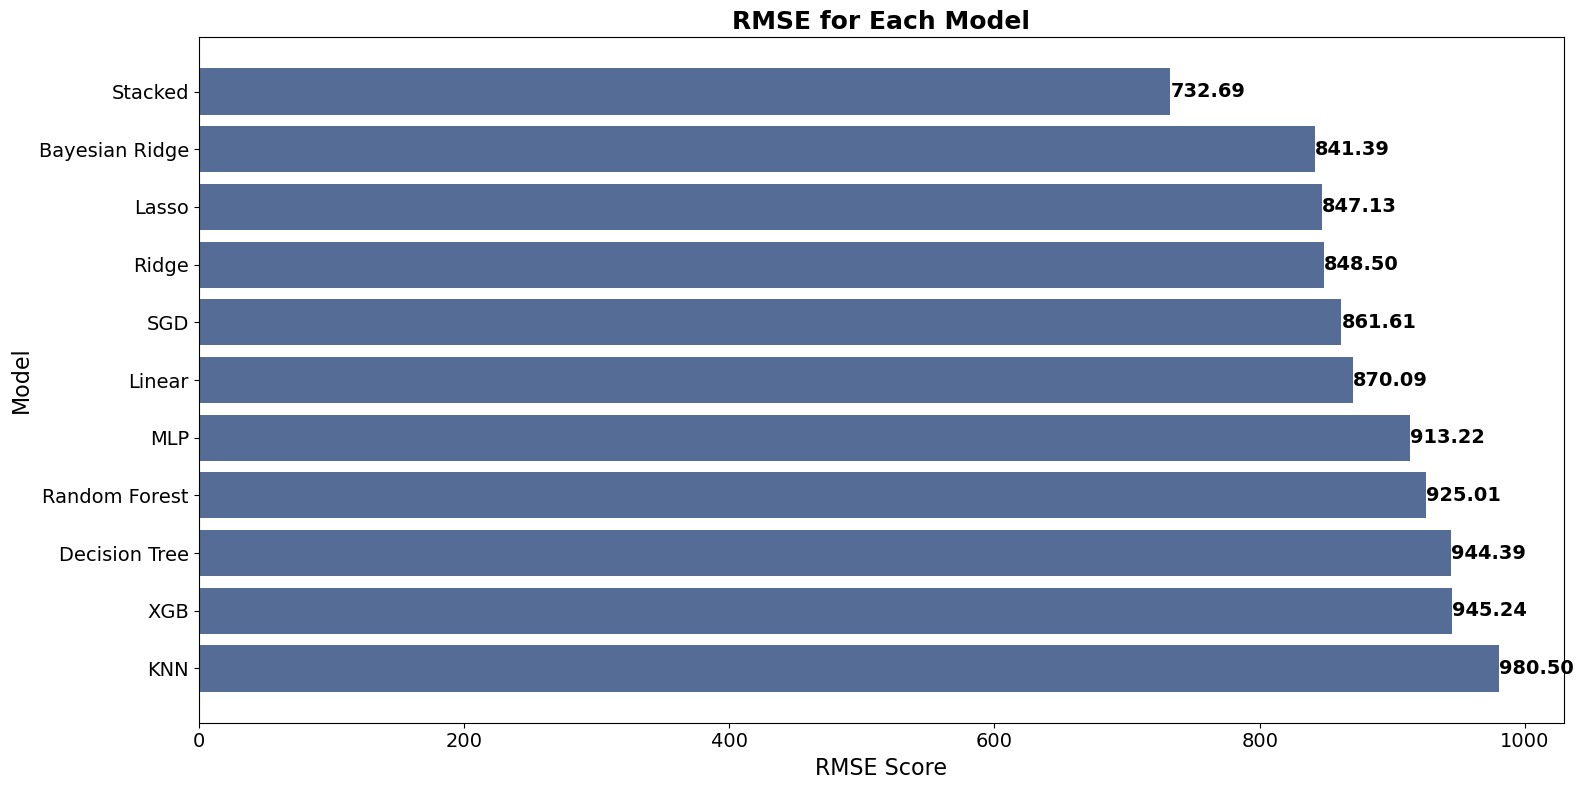

In [106]:
plt.figure(figsize=(16, 8))

plt.barh(list(sorted_rmse_scores.keys()), list(sorted_rmse_scores.values()), color='#556d96')

plt.title('RMSE for Each Model', fontsize=18, fontweight='bold')
plt.xlabel('RMSE Score', fontsize=16)
plt.ylabel('Model', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for model, rmse in sorted_rmse_scores.items():
    plt.text(rmse + 0.001, model, f"{rmse:.2f}", va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

The Stacked Model is the best-performing model, with the lowest RMSE of 732.69, making it the most reliable choice for predicting Propylene Glycol (PG) yield. For simpler alternatives, Bayesian Ridge Regression or Ridge Regression are strong candidates with relatively low RMSE and interpretable implementations.

Models like KNN, XGBoost, and Decision Tree should be avoided due to their high RMSE values, indicating poor prediction accuracy and reliability.

### R-Square Scores

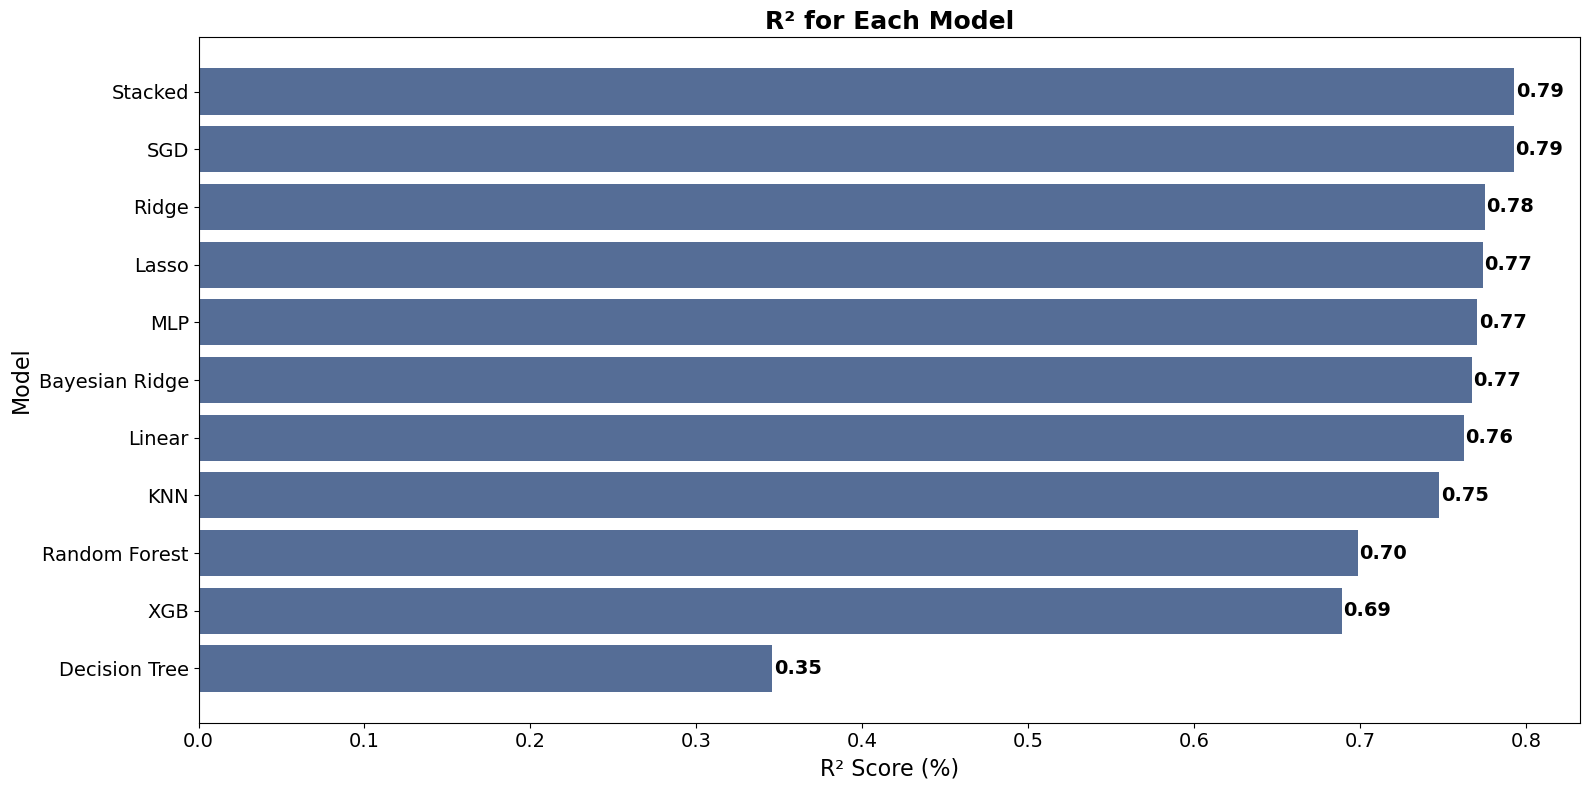

In [107]:
plt.figure(figsize=(16, 8))

plt.barh(list(sorted_r2_scores.keys()), list(sorted_r2_scores.values()), color='#556d96')

plt.title('R² for Each Model', fontsize=18, fontweight='bold')
plt.xlabel('R² Score (%)', fontsize=16)
plt.ylabel('Model', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for model, r2 in sorted_r2_scores.items():
    plt.text(r2 + 0.001, model, f"{r2:.2f}", va='center', fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()

* Best Model: The Stacked Model achieves the highest R² score (0.79), indicating it is the most reliable for explaining the variance in Propylene Glycol (PG) yield.
* Strong Alternatives: Ridge Regression, Bayesian Ridge, and SGD are close competitors, offering high performance with simpler implementations.
* Avoid: Decision Tree, XGBoost, and Random Forest, as they explain significantly less variance and are less reliable for this dataset.

### MAE Scores

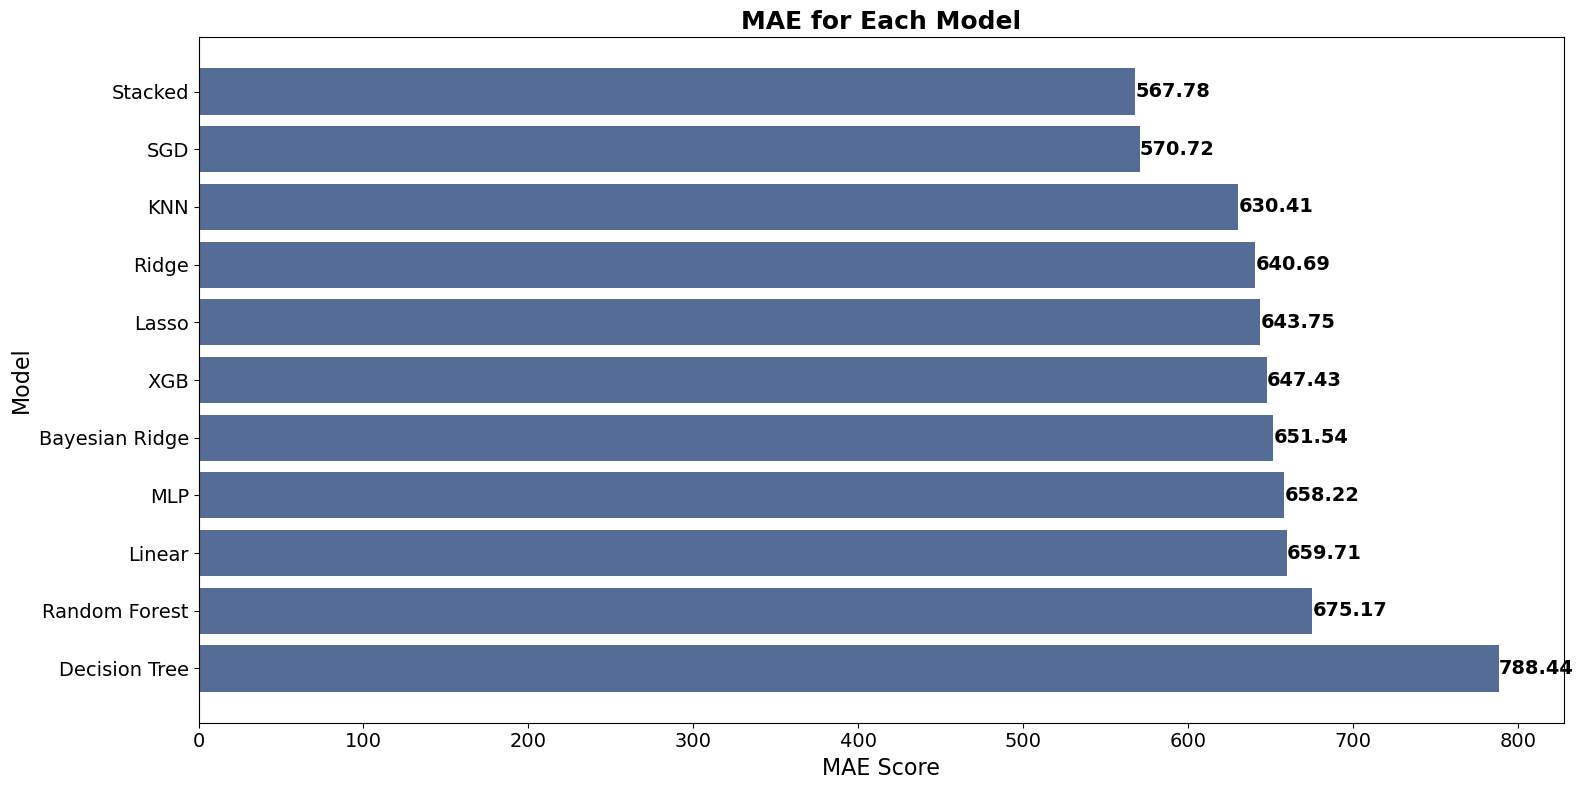

In [108]:
plt.figure(figsize=(16, 8))

plt.barh(list(sorted_mae_scores.keys()), list(sorted_mae_scores.values()), color='#556d96')

plt.title('MAE for Each Model', fontsize=18, fontweight='bold')
plt.xlabel('MAE Score', fontsize=16)
plt.ylabel('Model', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for model, mae in sorted_mae_scores.items():
    plt.text(mae + 0.001, model, f"{mae:.2f}", va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

* Best Model: The Stacked Model, with the lowest MAE of 567.78, demonstrates the best predictive accuracy and is the most reliable for Propylene Glycol yield prediction.
* Strong Alternatives: SGD, Ridge Regression, and Bayesian Ridge offer competitive performance and are strong contenders for simpler or more interpretable implementations.
* Avoid: Decision Tree and Random Forest, as their high MAE values indicate poor prediction accuracy and reliability for this dataset.

### MAPE Scores

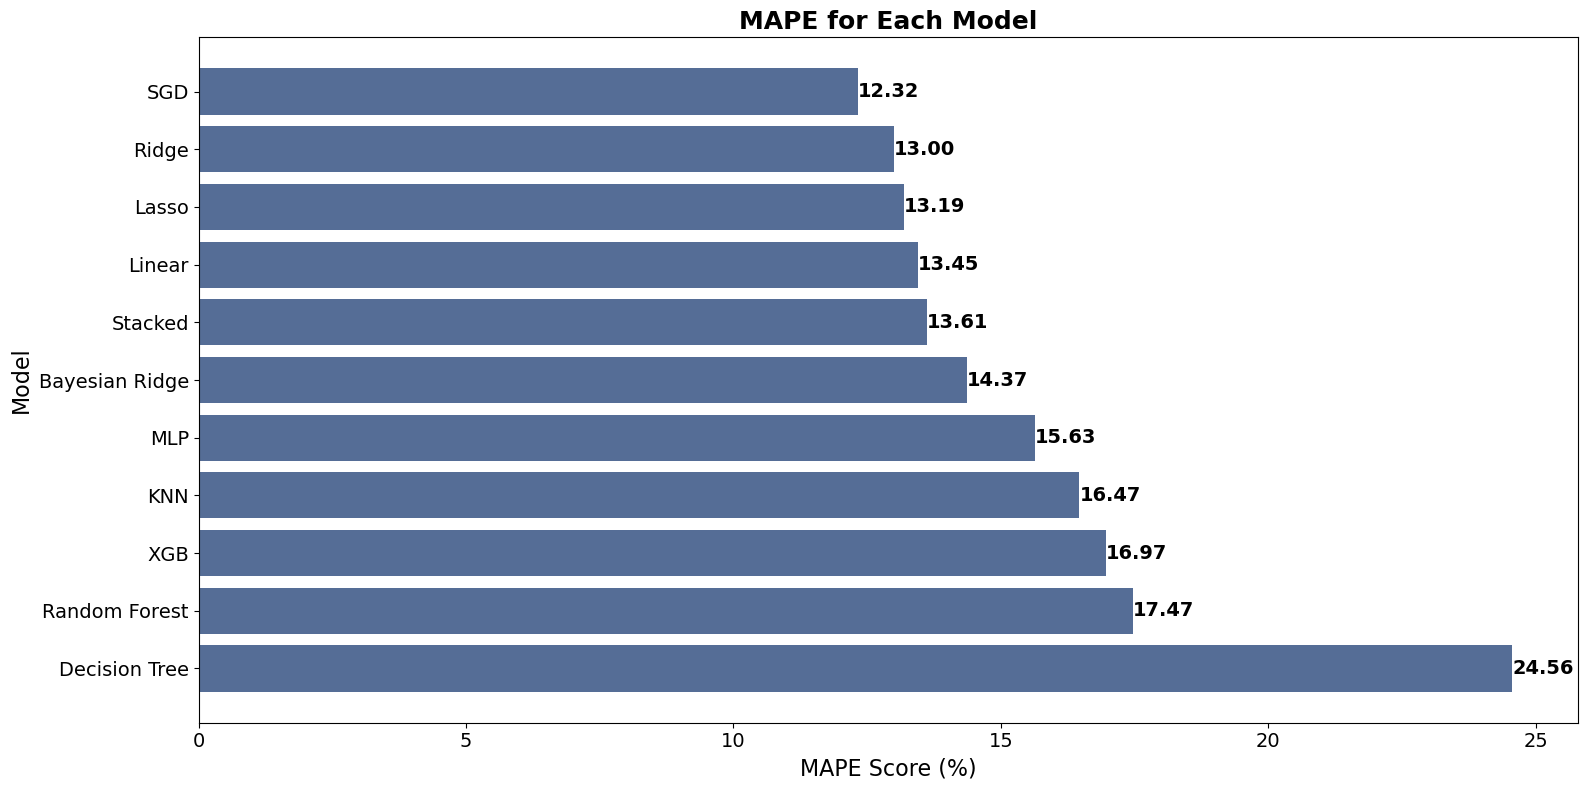

In [109]:
plt.figure(figsize=(16, 8))

plt.barh(list(sorted_mape_scores.keys()), list(sorted_mape_scores.values()), color='#556d96')

plt.title('MAPE for Each Model', fontsize=18, fontweight='bold')
plt.xlabel('MAPE Score (%)', fontsize=16)
plt.ylabel('Model', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for model, mape in sorted_mape_scores.items():
    plt.text(mape + 0.001, model, f"{mape:.2f}", va='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

* Best Model: SGD achieves the lowest MAPE (12.32%), making it the best choice for minimizing percentage-based errors and maximizing relative prediction accuracy.
* Strong Contenders: Ridge Regression, Bayesian Ridge, and the Stacked Model also deliver excellent performance, making them reliable alternatives with competitive MAPE scores.
* Avoid: Decision Tree and Random Forest models, as their high MAPE scores indicate poor prediction accuracy and low reliability.

Based on the comprehensive evaluation across performance metrics—RMSE, R², MAE, and MAPE—the **Stacked Model** consistently emerges as the best-performing model for predicting Propylene Glycol (PG) yield. It achieves the lowest RMSE (732.69) and MAE (567.78) while maintaining a high R² score (0.79) and competitive MAPE (13.61%), indicating its ability to capture complex relationships and provide accurate predictions. We will use this model for optimization modelling in finding optimal values for PG Yield production.

## OPTIMIZATION MODELLING

Genetic Algorithm (GA) is an optimization technique inspired by the principles of natural selection and biological evolution, making it an effective tool for solving complex, non-linear problems. By iteratively refining a population of potential solutions through selection, crossover, and mutation, GAs can efficiently explore the solution space to identify optimal outcomes. In this analysis, we will leverage the Genetic Algorithm to determine the optimal values of key parameters influencing Propylene Glycol (PG) yield. This approach allows us to navigate the complex interactions between variables and maximize PG output, ensuring a robust and efficient optimization process.

The code below implements a GA-based optimization to maximize the predicted Propylene Glycol (PG) yield using a pre-trained stacking model. It defines bounds to constrain input feature values based on their minimum and maximum in the dataset (no_calc_df). The fitness_func evaluates each solution (a set of feature values) by mapping the solution to the corresponding feature names, predicting the PG yield using the stacking model, and returning the predicted yield as the fitness score. The Genetic Algorithm uses this setup to iteratively adjust the feature values within the bounds to find the optimal combination that maximizes the predicted PG yield.

In [161]:
# bounds = {col: (X[col].min() - 0.1 * abs(X[col].min()), X[col].max() + 0.1 * abs(X[col].max())) for col in X.columns}
# bounds = {col: (no_calc_df[col].min(), no_calc_df[col].max()) for col in no_calc_df.columns}

# value ranges according to the client
bounds = {
    'Liquid Feed \n(L/h)': (3, 4),
    'Pure H2 Gas Flow Setpoint on PLC\n(g/h)': (75, 300),
    'Recycled H2 Gas Flow (g/h)': (0, 208),
    'RX-203 Pressure (psig)': (483, 813),
    'After HEX (°C)': (211, 282),
    'Average Temp.\n(°C)': (173.3, 235.8),
    'Feed \npH': (11.08, 11.43),
    'Product \npH': (3.56, 9.2),
    'Glycerol Area': (115.89, 7401.88),
    'Glycerol Feed Concentration (g/L)': (470.1, 888.6),
}


def fitness_func(_, sol, __):
    # best_model = lasso_search.best_estimator_
    best_model = stacking_model

    feature_values = dict(zip(X.columns, sol))
    yield_pred = best_model.predict([list(feature_values.values())])[0]
    return yield_pred

In [162]:
gene_space = [{'low': bounds[feature][0], 'high': bounds[feature][1]} for feature in X.columns]

ga_instance = GA(
    num_generations=20,
    num_parents_mating=10,
    fitness_func=fitness_func,
    sol_per_pop=20,
    num_genes=len(X.columns),
    gene_space=gene_space,
    mutation_probability=0.1,
    mutation_type="random",
    crossover_type="single_point",
    random_seed=42
)

ga_instance.run()

In [163]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()

optimal_values = dict(zip(X.columns, solution))


def round_value(value):
    return round(value, -int(f'{value:e}'.split('e')[1]) + 1)


optimal_values = {key: round_value(val) for key, val in optimal_values.items()}

In [164]:
print("Optimal values:")
optimal_values

Optimal values:


{'Liquid Feed \n(L/h)': 4.0,
 'Pure H2 Gas Flow Setpoint on PLC\n(g/h)': 250.0,
 'Recycled H2 Gas Flow (g/h)': 61.0,
 'RX-203 Pressure (psig)': 780.0,
 'After HEX (°C)': 250.0,
 'Average Temp.\n(°C)': 230.0,
 'Feed \npH': 11.0,
 'Product \npH': 4.6,
 'Glycerol Area': 360.0,
 'Glycerol Feed Concentration (g/L)': 610.0}

Above are optimal values for each of the variables mentioned according to genetic algorithm which works by randomly generating and evolving solutions (sets of feature values) through processes like selection, crossover, and mutation. Over multiple generations, it searches for the best combination of feature values that maximizes the model's predictive accuracy. The result is a set of optimized feature values that yield the most accurate predictions.

In [165]:
print(f"Predicted maximum PG Area: {solution_fitness:.2f}")

Predicted maximum PG Area: 7382.51


This is the maximum PG area predicted by the model. We can further calculate for the PG concentration and PG yield based on this output.

In [166]:
gly_constant = 0.0758
eg_constant = 0.0993
pg_constant = 0.0843

pg_area = solution_fitness
pg_concentration = pg_area * pg_constant
print('PG Concentration:', pg_concentration)

gly_feed_concentration = optimal_values['Glycerol Feed Concentration (g/L)']

gly_area = optimal_values['Glycerol Area']
gly_remain_concentration = gly_area * gly_constant
print('Glycerol Remaining Concentration:', gly_remain_concentration)

pg_yield = pg_concentration / (gly_feed_concentration - gly_remain_concentration)
print(f"PG Yield: {pg_yield * 100:.2f}")

PG Concentration: 622.3457646005663
Glycerol Remaining Concentration: 27.288000000000004
PG Yield: 106.80


The PG concentration, Glycerol Remaining Concentration and PG Yield predicted is in the top percentile when compared to the data provided.


## CONCLUSION

Using the optimized feature values determined by the Genetic Algorithm (GA) and the predictive stacking model, the maximum PG area was predicted as 7382.51. Finally, the optimization process resulted in a PG yield of 106.8%, demonstrating the effectiveness of the GA in identifying optimal parameter combinations to maximize Propylene Glycol production. These results highlight the potential for data-driven optimization methods to enhance industrial processes and improve product yields efficiently.